Fudhail M

IT-A 3122225002033

PRML Lab Ex4

SLP and MLP

Dataset used: Advertising sales dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
url = "/Users/fudhail/Downloads/advertising.csv"
advertising = pd.read_csv(url)

In [4]:
# Convert Sales into a binary variable (e.g., high sales vs. low sales)
median_sales = advertising['Sales'].median()
advertising['High_Sales'] = (advertising['Sales'] > median_sales).astype(int)

In [5]:
# Define features and target variable
X = advertising[['TV', 'Radio', 'Newspaper']]
y = advertising['High_Sales']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Single Layer Perceptron (SLP)
slp_model = MLPClassifier(hidden_layer_sizes=(), max_iter=10000, random_state=42)
slp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(), max_iter=10000, random_state=42)

In [9]:
# Multi-Layer Perceptron (MLP)
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)

In [10]:
# Make predictions
slp_pred = slp_model.predict(X_test)
mlp_pred = mlp_model.predict(X_test)

In [11]:
# Evaluate models
slp_accuracy = accuracy_score(y_test, slp_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)

In [12]:
slp_conf_matrix = confusion_matrix(y_test, slp_pred)
mlp_conf_matrix = confusion_matrix(y_test, mlp_pred)

In [13]:
print(f"SLP Accuracy: {slp_accuracy:.2f}")
print("SLP Confusion Matrix:")
print(slp_conf_matrix)
print("SLP Classification Report:")
print(classification_report(y_test, slp_pred))

print(f"MLP Accuracy: {mlp_accuracy:.2f}")
print("MLP Confusion Matrix:")
print(mlp_conf_matrix)
print("MLP Classification Report:")
print(classification_report(y_test, mlp_pred))

SLP Accuracy: 0.85
SLP Confusion Matrix:
[[17  5]
 [ 1 17]]
SLP Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85        22
           1       0.77      0.94      0.85        18

    accuracy                           0.85        40
   macro avg       0.86      0.86      0.85        40
weighted avg       0.87      0.85      0.85        40

MLP Accuracy: 0.88
MLP Confusion Matrix:
[[18  4]
 [ 1 17]]
MLP Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88        22
           1       0.81      0.94      0.87        18

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.89      0.88      0.88        40



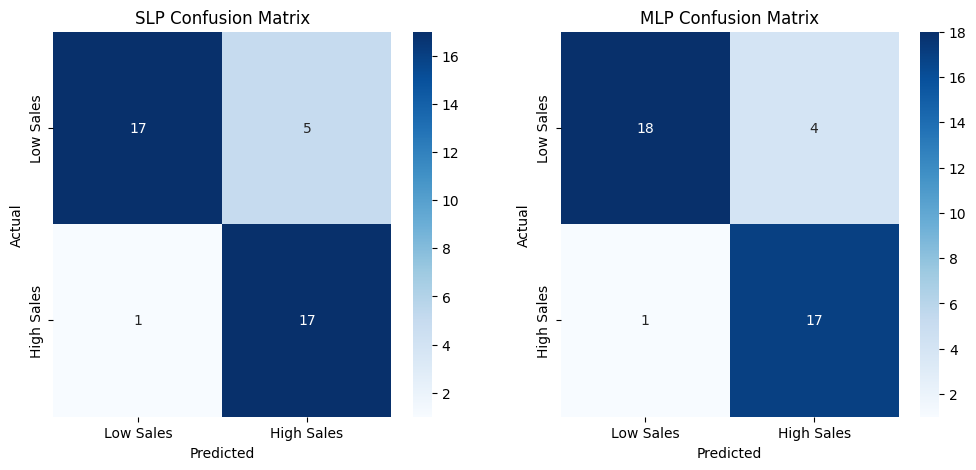

In [14]:
# Visualize the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(slp_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=['Low Sales', 'High Sales'], yticklabels=['Low Sales', 'High Sales'])
axes[0].set_title("SLP Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(mlp_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[1], xticklabels=['Low Sales', 'High Sales'], yticklabels=['Low Sales', 'High Sales'])
axes[1].set_title("MLP Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()